In [9]:
%pip install matplotlib

     ---------------------------------------- 7.6/7.6 MB 3.5 MB/s eta 0:00:00
     -------------------------------------- 163.0/163.0 kB 9.5 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 12.8 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB ? eta 0:00:00
     --------------------------------------- 14.8/14.8 MB 22.6 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 26.6 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 5.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from consts import *

In [35]:
path = "results/"
knss = [24, 25]
categorys = [2, 4]
agg_scores = []
kns_cat = []
knastot = {}
catagor = {}
for kns in knss:
    for cat in categorys:
        with open(f'{path}finetune_{kns}_{cat}.pkl', 'rb') as f:
            tmp_dct = pickle.load(f)
        warnings = tmp_dct['warnings']
        agg_score = tmp_dct['agg_score']
        agg_scores.append(agg_score)
        kns_cat.append(f'{kns}_{CATEGORY_ID_TO_NAME[cat]}')
        tmp_val = knastot.get(kns, [])
        tmp_val.append(agg_score)
        knastot[kns] = tmp_val
        catagor[CATEGORY_ID_TO_NAME[cat]] = tmp_val
avg_knasot = {}
for kns, agg_lst in knastot.items():
    avg_knasot[int(kns)] = np.average(agg_lst)
avg_cat = {}
for cat, agg_lst in catagor.items():
    avg_cat[cat] = np.average(agg_lst)

In [48]:
ind = 0
knasots = {}
for k_c in kns_cat:
    a = k_c[:2]
    tmp = knasots.get(a, [[], []])
    tmp[0].append(k_c)
    tmp[1].append(agg_scores[ind])
    knasots[a] = tmp
    ind += 1


In [49]:
knasots

{'24': [['24_ועדת כספים', '24_ועדת חוץ ובטחון'],
  [0.391812865497076, 0.48654708520179374]],
 '25': [['25_ועדת כספים', '25_ועדת חוץ ובטחון'],
  [0.42727272727272725, 0.49206349206349204]]}

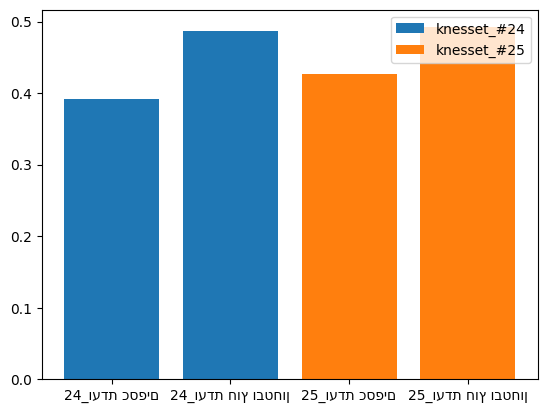

In [52]:
for kns, duo in knasots.items():
    plt.bar(duo[0], duo[1], label= f'knesset_#{kns}')
plt.legend()
plt.show()

<BarContainer object of 2 artists>

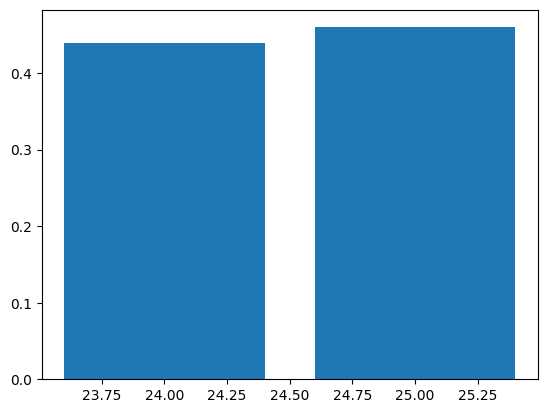

In [37]:
plt.bar(avg_knasot.keys(), avg_knasot.values())

<BarContainer object of 2 artists>

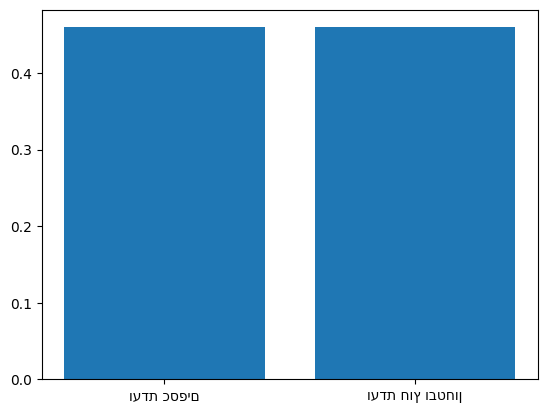

In [38]:
plt.bar(avg_cat.keys(), avg_cat.values())